In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Projects\Airlines_Fare_Predictor\Airlines_Cleaned_File.csv')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2,1,5955


In [3]:
df.shape

(300153, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int64 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 22.9+ MB


Data is fully pre-processed so I perform next step which is 'feature encoding'.

# Outlier Detection

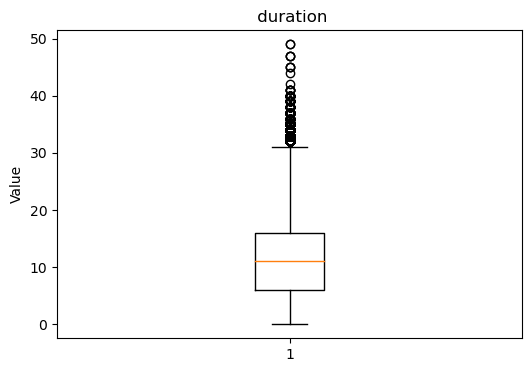

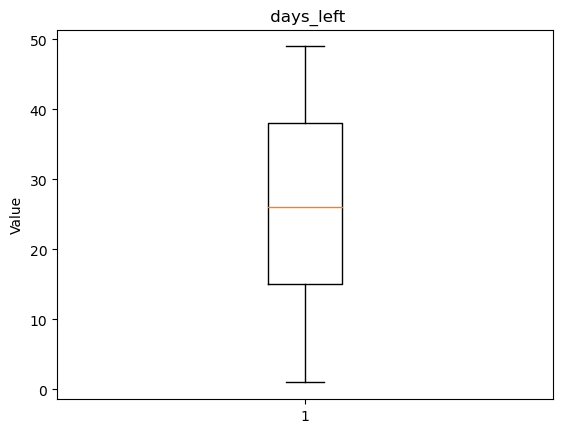

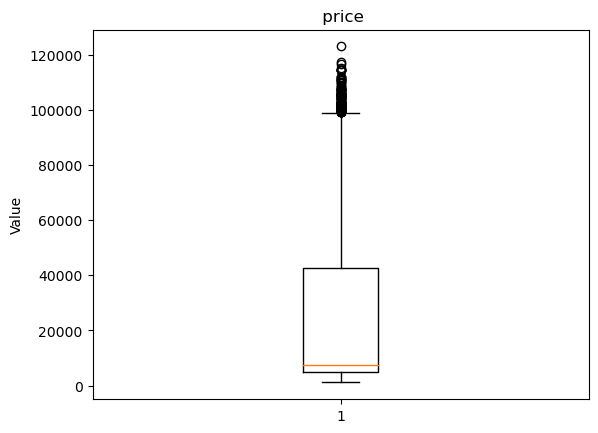

In [5]:
plt.figure(figsize=(6,4))

for column in df.select_dtypes(include='number'):
    plt.boxplot(df[column])
    plt.title(f' {column}')
    plt.ylabel('Value')
    plt.show()

Duration and Price columns have Outliers. Price is the target variable so, we can not treat outliers of price.

In [6]:
df['duration'].unique()

array([ 2, 12, 16, 11, 14, 15,  3,  5,  8,  6, 18, 23, 24,  4, 19, 22, 26,
       17, 20, 21,  7, 10, 28,  9, 13, 29, 27, 30, 25, 31, 33, 36, 35, 34,
       39,  1, 37, 40, 32, 41, 38,  0, 47, 42, 49, 45, 44], dtype=int64)

Duration column have outliers statistically but logically these are not outliers so, I do not drop them.

# Feature Encoding

In [7]:
#checking unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: airline
Unique Values:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Column: source_city
Unique Values:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Column: departure_time
Unique Values:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Column: stops
Unique Values:
['zero' 'one' 'two_or_more']

Column: arrival_time
Unique Values:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Column: destination_city
Unique Values:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Column: class
Unique Values:
['Economy' 'Business']

Column: duration
Unique Values:
[ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]

Column: days_left
Unique Values:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]

Column: 

### All the categorical variables are nomial. So, One Hot Encoding is the right option.

In [8]:
#using get_dummies method

d1 = pd.get_dummies(df['airline'], drop_first = True,prefix='airline')

d2 = pd.get_dummies(df['source_city'], drop_first = True,prefix='source_city')

d3 = pd.get_dummies(df["departure_time"], drop_first=True,prefix='departure_time')

d4 = pd.get_dummies(df["stops"],drop_first=True,prefix='stops')

d5 = pd.get_dummies(df["arrival_time"],drop_first=True,prefix='arrival_time')

d6 = pd.get_dummies(df["destination_city"],drop_first=True,prefix='destination_city')

d7 = pd.get_dummies(df["class"],drop_first=True,prefix='class')

In [9]:
df = pd.concat([df,d1,d2,d3,d4,d5,d6,d7],axis=1)

In [10]:
df = df.drop(columns=['airline','source_city','departure_time','stops','arrival_time','destination_city','class'])
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,2,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,2,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [11]:
df.columns.tolist()

['duration',
 'days_left',
 'price',
 'airline_Air_India',
 'airline_GO_FIRST',
 'airline_Indigo',
 'airline_SpiceJet',
 'airline_Vistara',
 'source_city_Chennai',
 'source_city_Delhi',
 'source_city_Hyderabad',
 'source_city_Kolkata',
 'source_city_Mumbai',
 'departure_time_Early_Morning',
 'departure_time_Evening',
 'departure_time_Late_Night',
 'departure_time_Morning',
 'departure_time_Night',
 'stops_two_or_more',
 'stops_zero',
 'arrival_time_Early_Morning',
 'arrival_time_Evening',
 'arrival_time_Late_Night',
 'arrival_time_Morning',
 'arrival_time_Night',
 'destination_city_Chennai',
 'destination_city_Delhi',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'destination_city_Mumbai',
 'class_Economy']

In [12]:
#check data types of all variables to confrim that all variables are in 'int' or 'float' 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   duration                      300153 non-null  int64
 1   days_left                     300153 non-null  int64
 2   price                         300153 non-null  int64
 3   airline_Air_India             300153 non-null  uint8
 4   airline_GO_FIRST              300153 non-null  uint8
 5   airline_Indigo                300153 non-null  uint8
 6   airline_SpiceJet              300153 non-null  uint8
 7   airline_Vistara               300153 non-null  uint8
 8   source_city_Chennai           300153 non-null  uint8
 9   source_city_Delhi             300153 non-null  uint8
 10  source_city_Hyderabad         300153 non-null  uint8
 11  source_city_Kolkata           300153 non-null  uint8
 12  source_city_Mumbai            300153 non-null  uint8
 13  departure_time

Data types of all variables are fine.

# Checking Distribution and Skewness of Data

In [13]:
df.shape

(300153, 31)

### Only 2 Variables needs to check distribution: 'duration', 'days_left'

In [14]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 300153
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 19


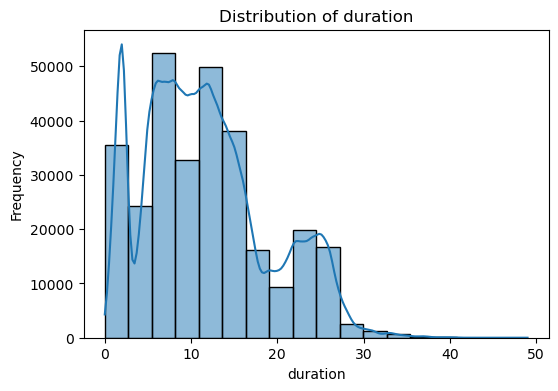

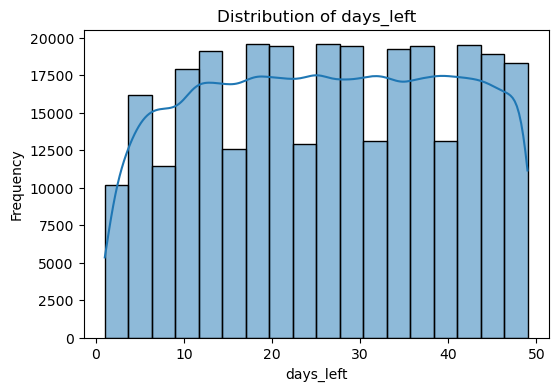

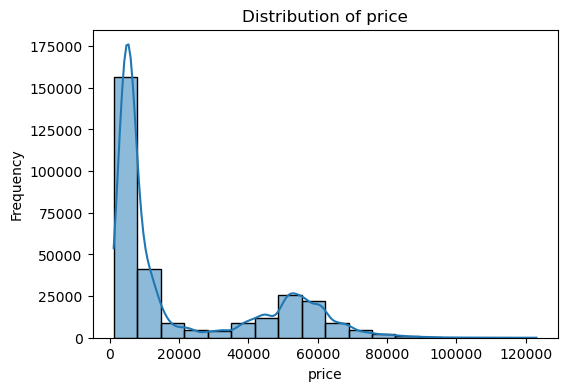

In [15]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=18, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [16]:
# check skewness of all continuous variables
df[continuous_vars].skew()

duration     0.601337
days_left   -0.035464
price        1.061377
dtype: float64

### 'days_left' is not skewed and 'duration' is moderate skewed and 'price' is dependent variable. Therefore, transformation is not needed.

# Feature Scaling

In [17]:
#checking which variables needs scaling

for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: duration
Unique Values:
[ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]

Column: days_left
Unique Values:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]

Column: price
Unique Values:
[ 5953  5956  5955 ... 87051 74731 77105]

Column: airline_Air_India
Unique Values:
[0 1]

Column: airline_GO_FIRST
Unique Values:
[0 1]

Column: airline_Indigo
Unique Values:
[0 1]

Column: airline_SpiceJet
Unique Values:
[1 0]

Column: airline_Vistara
Unique Values:
[0 1]

Column: source_city_Chennai
Unique Values:
[0 1]

Column: source_city_Delhi
Unique Values:
[1 0]

Column: source_city_Hyderabad
Unique Values:
[0 1]

Column: source_city_Kolkata
Unique Values:
[0 1]

Column: source_city_Mumbai
Unique Values:
[0 1]

Column: departure_time_Early_Morning
Unique Values:
[0 1]

Column: departure_time_Ev

### Only 2 variables needs scaling: 'duration', 'days_left'. I decide to apply min_max scaler because data has a bounded range and most of data is in 0-1 range.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [19]:
columns_to_scale = ['duration', 'days_left']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,0.040816,0.0,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,0.040816,0.0,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,0.040816,0.0,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,0.040816,0.0,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,0.040816,0.0,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [20]:
for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: duration
Unique Values:
[0.04081633 0.24489796 0.32653061 0.2244898  0.28571429 0.30612245
 0.06122449 0.10204082 0.16326531 0.12244898 0.36734694 0.46938776
 0.48979592 0.08163265 0.3877551  0.44897959 0.53061224 0.34693878
 0.40816327 0.42857143 0.14285714 0.20408163 0.57142857 0.18367347
 0.26530612 0.59183673 0.55102041 0.6122449  0.51020408 0.63265306
 0.67346939 0.73469388 0.71428571 0.69387755 0.79591837 0.02040816
 0.75510204 0.81632653 0.65306122 0.83673469 0.7755102  0.
 0.95918367 0.85714286 1.         0.91836735 0.89795918]

Column: days_left
Unique Values:
[0.         0.02083333 0.04166667 0.0625     0.08333333 0.10416667
 0.125      0.14583333 0.16666667 0.1875     0.20833333 0.22916667
 0.25       0.27083333 0.29166667 0.3125     0.33333333 0.35416667
 0.375      0.39583333 0.41666667 0.4375     0.45833333 0.47916667
 0.5        0.52083333 0.54166667 0.5625     0.58333333 0.60416667
 0.625      0.64583333 0.66666667 0.6875     0.70833333 0.72916667
 0.75       0.

Scaling successfully done.

# Check colinearity between variables to avoid model from overfitting.

In [21]:
df.corr()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
duration,1.000000,-0.039206,0.205079,0.276124,-0.139994,-0.365838,0.008352,0.134154,0.032869,-0.048764,0.002978,0.060417,-0.023285,-0.047439,0.103666,-0.045314,-0.071096,0.116430,0.092617,-0.514494,0.012116,0.033605,-0.107231,0.121964,-0.064201,0.060798,-0.114467,0.066452,0.061827,-0.044618,-0.139375
days_left,-0.039206,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,0.010817,0.000265,-0.008742,0.003322,-0.010238,0.012000,-0.003206,0.004004,-0.018624,-0.001326,0.020204,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.013039
price,0.205079,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,-0.012828,0.016127,0.013206,-0.012232,0.007946,-0.033768,0.018199,0.041768,-0.064248,-0.187277,-0.060449,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.937860
airline_Air_India,0.276124,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,0.001987,-0.001883,0.036697,0.033703,0.019692,-0.006956,-0.024826,0.010730,-0.003709,-0.076130,-0.025510,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490,-0.124899
airline_GO_FIRST,-0.139994,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,-0.023541,0.000409,0.026898,0.028405,-0.003699,0.008566,-0.040410,-0.025366,-0.037670,0.017032,0.085654,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.194540
airline_Indigo,-0.365838,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,0.009778,0.016766,-0.029344,-0.032224,-0.020572,0.077697,0.028371,-0.072394,-0.054064,0.176689,0.013864,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242,0.275477
airline_SpiceJet,0.008352,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,-0.050872,0.030020,-0.004572,0.033931,0.003626,-0.011630,-0.028322,0.005247,-0.037861,0.082991,0.022834,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.118325
airline_Vistara,0.134154,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,0.028317,-0.027183,-0.006793,-0.036206,-0.005037,-0.056948,0.056992,0.042486,0.024844,-0.105280,-0.058766,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.302116
source_city_Chennai,0.032869,0.002581,0.018742,-0.011600,-0.063273,0.033626,0.003331,0.031174,1.000000,-0.194991,-0.152609,-0.164406,-0.194098,0.016910,-0.072170,-0.014559,0.032187,0.036862,-0.000581,-0.026563,-0.017194,0.016559,0.009136,-0.024027,0.004418,-0.151660,0.060364,0.016905,0.015972,0.042960,-0.010204
source_city_Delhi,-0.048764,-0.001292,-0.043282,0.009886,0.030585,-0.012615,0.033040,-0.046163,-0.194991,1.000000,-0.201038,-0.216579,-0.255693,-0.027850,0.069864,0.011309,-0.016733,-0.062611,0.008464,0.069467,0.079021,-0.025908,-0.028147,0.003773,-0.007427,0.061265,-0.246344,0.014093,0.040300,0.066721,0.014098


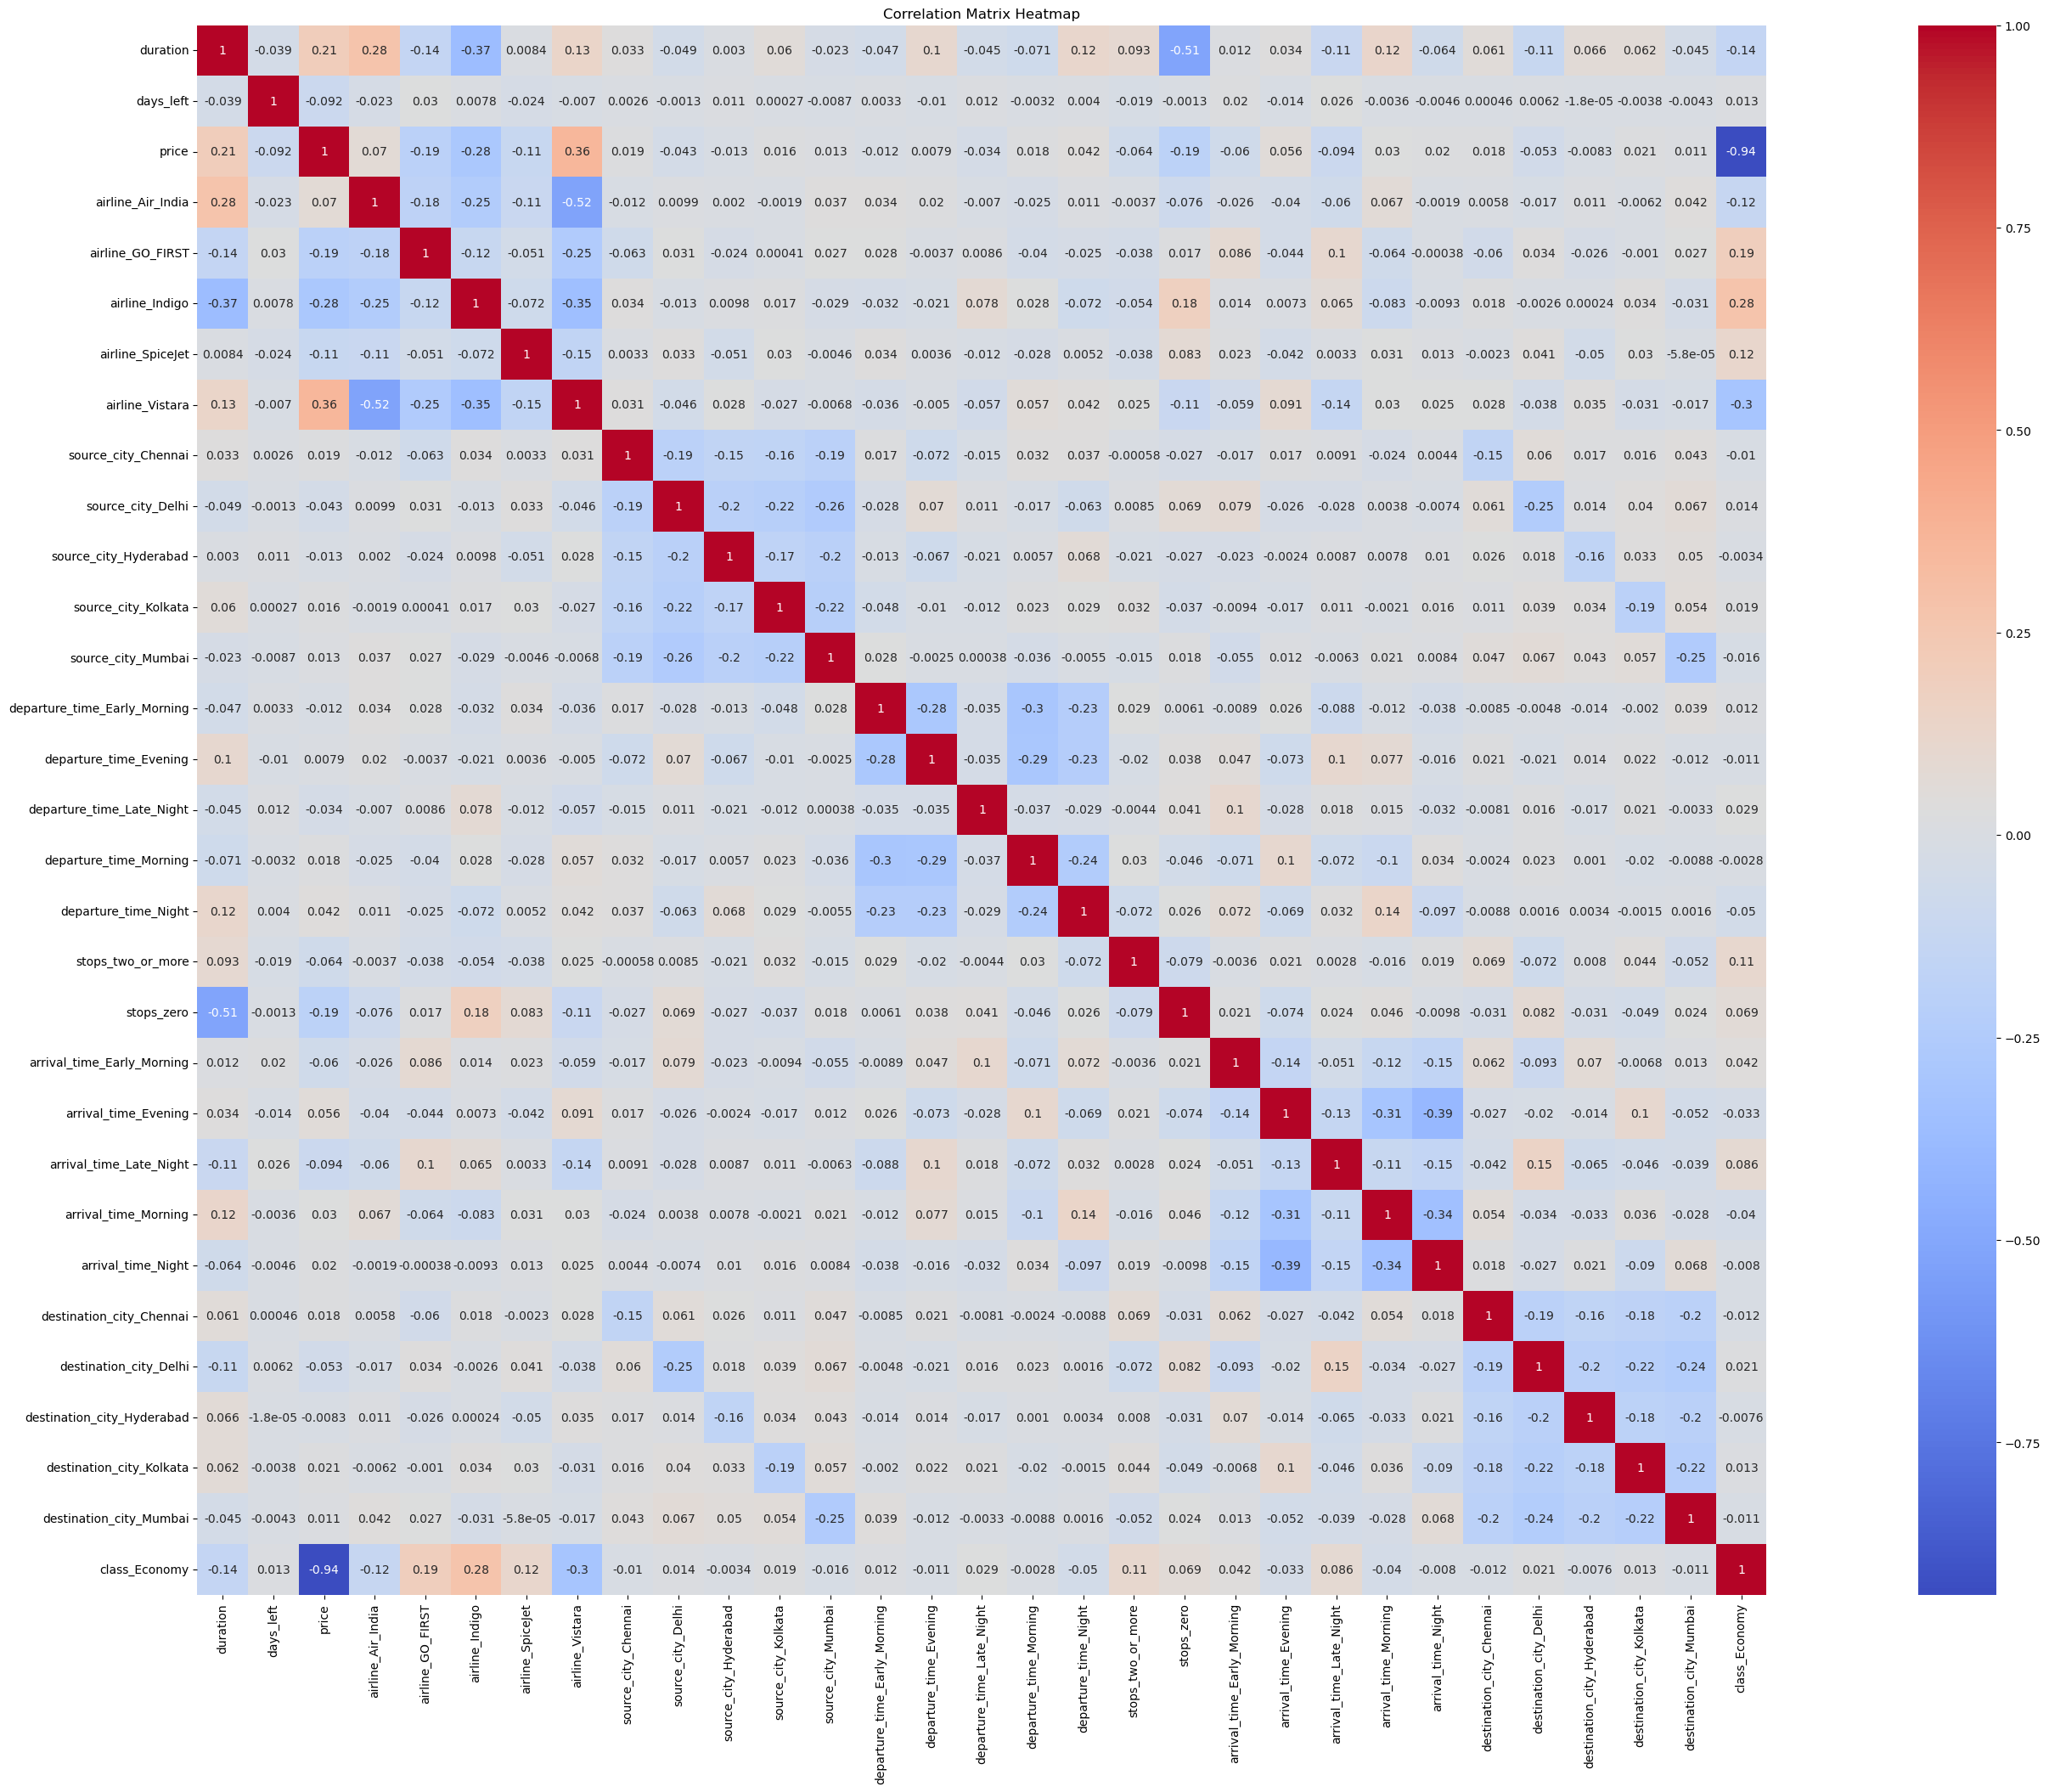

In [22]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(46,24)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

No variable is highly correlated

# Diving data into train and test set

In [23]:
x = df.drop("price",axis=1)
y = df['price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
X_train.shape, X_test.shape

((210107, 30), (90046, 30))

In [26]:
y_train.shape, y_test.shape

((210107,), (90046,))

# Feature Selection using Random Forest Feature Importance Method



In [27]:
from sklearn.ensemble import RandomForestRegressor  

random_forest = RandomForestRegressor(n_jobs=-1, random_state=42)  

random_forest.fit(X_train, y_train)

importances = random_forest.feature_importances_

feature_importance_rankings = dict(zip(X_train.columns, importances))

sorted_rankings = sorted(feature_importance_rankings.items(), key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(sorted_rankings, 1):
    print(f"{i}. {feature}: {importance}")

1. class_Economy: 0.8818453954331165
2. duration: 0.05186193132470462
3. days_left: 0.020905661066126735
4. airline_Vistara: 0.0055929179410282165
5. airline_Air_India: 0.004773513757143237
6. source_city_Delhi: 0.003875093580591324
7. destination_city_Delhi: 0.0036943584340620307
8. source_city_Mumbai: 0.0024812953319500782
9. destination_city_Mumbai: 0.0024099372575918585
10. source_city_Kolkata: 0.0020781631531280806
11. destination_city_Hyderabad: 0.0020507696346153967
12. arrival_time_Evening: 0.0019258665424492834
13. destination_city_Kolkata: 0.0018931280918956911
14. stops_two_or_more: 0.0016791971331601987
15. source_city_Hyderabad: 0.0016235736656300035
16. arrival_time_Night: 0.0015204973394000194
17. departure_time_Morning: 0.0014639629337968604
18. destination_city_Chennai: 0.0013569335773411675
19. departure_time_Evening: 0.0013559196846040843
20. source_city_Chennai: 0.001346133507389903
21. departure_time_Early_Morning: 0.0009930105786012365
22. departure_time_Night: 0.

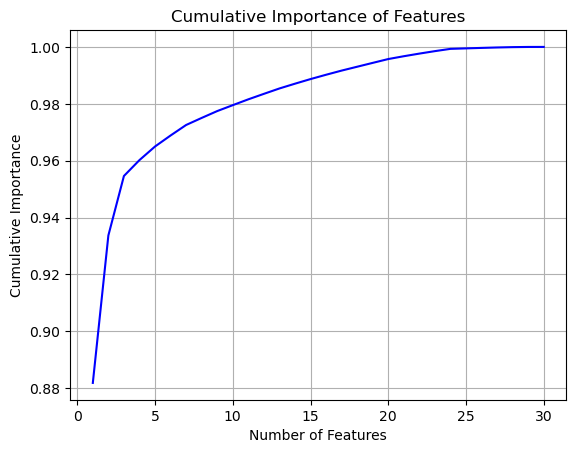

In [28]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [29]:
#select optimal number of features

feature_importances = random_forest.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values('Importance', ascending=False)

top_features = importance_df.head(25)['Feature'].tolist()

# Update X_train and X_test to include only the top features
X_train = X_train[top_features]
X_test = X_test[top_features]

In [30]:
#checking columns of X_train
X_train.columns.tolist()

['class_Economy',
 'duration',
 'days_left',
 'airline_Vistara',
 'airline_Air_India',
 'source_city_Delhi',
 'destination_city_Delhi',
 'source_city_Mumbai',
 'destination_city_Mumbai',
 'source_city_Kolkata',
 'destination_city_Hyderabad',
 'arrival_time_Evening',
 'destination_city_Kolkata',
 'stops_two_or_more',
 'source_city_Hyderabad',
 'arrival_time_Night',
 'departure_time_Morning',
 'destination_city_Chennai',
 'departure_time_Evening',
 'source_city_Chennai',
 'departure_time_Early_Morning',
 'departure_time_Night',
 'arrival_time_Morning',
 'arrival_time_Early_Morning',
 'arrival_time_Late_Night']

# Check multi-colinearity between variables to avoid model from overfitting.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
1,duration,4.778065
2,days_left,4.010097
0,class_Economy,3.531352
3,airline_Vistara,3.275879
15,arrival_time_Night,2.907755
11,arrival_time_Evening,2.663901
4,airline_Air_India,2.555633
22,arrival_time_Morning,2.438536
16,departure_time_Morning,2.244220
18,departure_time_Evening,2.236810


All variables has VIF value less than 5. So, there is no need to drop any variable.

# Model Building

In [32]:
# import regression algorithms and metrics
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
#building models of various algorithms

algorithms = [
    LinearRegression(n_jobs=-1),
    Ridge(random_state=42),
    Lasso(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_jobs=-1, random_state=42),
    AdaBoostRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(n_jobs=-1, random_state=42)
]

train_results = []

for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    n_train = X_train.shape[0]
    p_train = X_train.shape[1]
    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

    end_time = time.time()  # End timer
    building_time = end_time - start_time
    
    train_results.append({
        'Model': type(algorithm).__name__,
        'MSE': mse_train,
        'RMSE': rmse_train,
        'MAE': mae_train,
        'R-squared': r2_train,
        'Adjusted R-squared': adj_r2_train,
        'Building Time (s)': building_time
    })

train_results_df = pd.DataFrame(train_results)
train_results_df = train_results_df.sort_values(by='MSE')

train_results_df

,Model,MSE,RMSE,MAE,R-squared,Adjusted R-squared,Building Time (s)
3,DecisionTreeRegressor,2.544254e+06,1595.071720,411.758137,0.995064,0.995063,1.593403
4,RandomForestRegressor,3.444719e+06,1855.995477,757.943051,0.993317,0.993316,53.265259
7,XGBRegressor,1.334227e+07,3652.707625,2120.176131,0.974113,0.974110,9.802836
6,GradientBoostingRegressor,2.488857e+07,4988.844988,3012.247677,0.951711,0.951705,26.272079
5,AdaBoostRegressor,3.798308e+07,6163.041367,4082.083672,0.926305,0.926296,31.466496
0,LinearRegression,4.995113e+07,7067.611020,4490.755874,0.903085,0.903073,0.402498
1,Ridge,4.995113e+07,7067.611054,4490.708961,0.903085,0.903073,0.159964
2,Lasso,4.995159e+07,7067.643707,4487.943436,0.903084,0.903072,0.285485


In [35]:
test_results = []

for algorithm in algorithms:
    y_test_pred = algorithm.predict(X_test)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    n_test = X_test.shape[0]
    p_test = X_test.shape[1]
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

    test_results.append({
        'Model': type(algorithm).__name__,
        'MSE': mse_test,
        'RMSE': rmse_test,
        'MAE': mae_test,
        'R-squared': r2_test,
        'Adjusted R-squared': adj_r2_test
    })

test_results_df = pd.DataFrame(test_results)
test_results_df = test_results_df.sort_values(by='MSE')

test_results_df

,Model,MSE,RMSE,MAE,R-squared,Adjusted R-squared
4,RandomForestRegressor,1.286560e+07,3586.864969,1583.901600,0.975002,0.974995
7,XGBRegressor,1.428959e+07,3780.156762,2170.379412,0.972235,0.972228
3,DecisionTreeRegressor,1.887035e+07,4344.001920,1750.514725,0.963335,0.963325
6,GradientBoostingRegressor,2.519721e+07,5019.681801,3007.934102,0.951042,0.951028
5,AdaBoostRegressor,3.875494e+07,6225.346658,4096.286861,0.924699,0.924678
2,Lasso,4.976697e+07,7054.571134,4453.980306,0.903302,0.903276
1,Ridge,4.976751e+07,7054.609255,4456.827516,0.903301,0.903275
0,LinearRegression,4.976758e+07,7054.613810,4456.877660,0.903301,0.903274


### I Choose Random Forest as Final Model because it has lowest "MSE" and highest "Adjusted R-squared" on test data and it doesn't overfit or underfit.

In [51]:
#building Random Forest Model

random_forest = RandomForestRegressor(n_jobs=-1, random_state=42)  

random_forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
#compute feature importance and create data frame of it 

feature_importance = random_forest.feature_importances_

importance_dict = {
    'Feature': X_train.columns,
    'Importance': feature_importance
}

feature_importance_df = pd.DataFrame(importance_dict)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
0,class_Economy,0.881975
1,duration,0.052071
2,days_left,0.020889
3,airline_Vistara,0.005241
4,airline_Air_India,0.005142
5,source_city_Delhi,0.003890
6,destination_city_Delhi,0.003708
7,source_city_Mumbai,0.002498
8,destination_city_Mumbai,0.002423
9,source_city_Kolkata,0.002060


# Hyper Parameter Tunning for Model Optimization

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_train, y_train)

### This error shows that there is insufficient memory available in RAM and due to lack of computational power hyperparameter tunning fails. So, I decide to perform Cross-Validation instead of hyperparameter tunning.

In [41]:
# Perform cross-validation and calculate evaluation metrics

from sklearn.model_selection import cross_val_score

mse_scores = -cross_val_score(random_forest, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = mse_scores ** 0.5
mae_scores = -cross_val_score(random_forest, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
r2_scores = cross_val_score(random_forest, X_train, y_train, scoring='r2', cv=5)

I do not consider Adjusted R-squared in cross-validation because Adjusted R-squared is calculated for the entire training set, not for each validation set. Adjusted R-squared takes into account the features used in the model, and in cross-validation, the feature set remains the same across all validation sets. Therefore, it is not necessary to calculate Adjusted R-squared separately for each validation set in cross-validation.

In [47]:
# Compute mean of evaulation metrics of validation sets

mse_mean = mse_scores.mean()
rmse_mean = rmse_scores.mean()
mae_mean = mae_scores.mean()
r2_mean = r2_scores.mean()

#create a data frame of metrics

metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared'],
    'Mean': [mse_mean, rmse_mean, mae_mean, r2_mean]}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Metric,Mean
0,Mean Squared Error (MSE),1.253614e+07
1,Root Mean Squared Error (RMSE),3.540557e+03
2,Mean Absolute Error (MAE),1.600084e+03
3,R-squared,9.756779e-01


# Report:-

I experimented with several regression algorithms and compared their MSE values on both the training set and the test set. After evaluating the results, I found that the Random Forest algorithm performed the best among all the models. Therefore, I decided to focus on further improving the Random Forest model.

Next, I attempted hyperparameter tuning to enhance the performance of the model. However, due to the limited computational power of my machine, I encountered difficulties in effectively conducting the hyperparameter tuning process.

As an alternative, I conducted cross-validation to assess the model's performance. Although the improvement achieved through cross-validation was modest, it still provided a slight enhancement in the overall performance of the Random Forest model.'

## Model Summary
    
* Training Set
|MSE|	RMSE|	MAE	|R-squared|	Adjusted R-squared|
|-----|--------|---------|----------|--------------|
|3.444719e+06|	1855.995477|	757.943051|	0.993317	|0.99331|


* Test Data
    
|MSE|	RMSE|	MAE	|R-squared|	Adjusted R-squared|
|----------------|-----|----|----------|--------------|
|	1.286560e+07|	3586.864969|	1583.901600|	0.975002|	0.974995|
    
    
* Validation Set

|Metric|	Mean|
|--------|--------|
|	Mean Squared Error (MSE)|	1.253614e+07|
|	Root Mean Squared Error (RMSE)|	3.540557e+03|
|	Mean Absolute Error (MAE)|	1.600084e+03|
|	R-squared	|9.756779e-01|
    


### Top predictors

Below are the top variables that have the most significant impact on whether it will rain tomorrow or not.

| Variables   | Importance |
|---------------------|--------------|
|class_Economy|0.881975|
|duration|0.052071|
|days_left|0.020889|

Airlines prices are primarily dependent on these factors, with 95% of the variation in prices being attributed to them. Specifically, 88% of the variation in prices can be explained by the factor of one class_economy alone.

# Save model to a file

In [54]:
import joblib


model = random_forest

# Save the model to a file
joblib.dump(model, 'Airlines_Fare_Predictor.pkl')

['Airlines_Fare_Predictor.pkl']